In [52]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
#import pyarrow.feather as feather
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.model_selection import train_test_split
import pytorch_tabnet

from pytorch_tabnet.tab_model import TabNetClassifier
import torch


from sklearn.model_selection import KFold, cross_val_score

# import xgboost as xgb
import optuna
from optuna import Trial, visualization



# Convert to classification task

In [53]:

# grouped_data["Success_Rates"] = 10 * grouped_data["Success_Rates"]
# grouped_data['Success_Rates'] = grouped_data['Success_Rates'].astype(np.int64)
# grouped_data = grouped_data.mul({'Success_Rates': 10}, axis='columns')
# grouped_data.to_csv('6dof_classification.csv')

grouped_data = pd.read_csv('6dof_classification.csv')
grouped_data = grouped_data.drop(columns='Unnamed: 0')
grouped_data


,Link2 length,Link3 length,Link4 length,Link5 length,Link6 length,Success_Rates,Joint2 type_pitch,Joint2 type_pris,Joint2 type_roll,Joint3 type_pitch,...,Joint3 axis_z,Joint4 axis_x,Joint4 axis_y,Joint4 axis_z,Joint5 axis_x,Joint5 axis_y,Joint5 axis_z,Joint6 axis_x,Joint6 axis_y,Joint6 axis_z
0,0.1,0.1,0.1,0.3,0.7,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0.1,0.1,0.1,0.5,0.5,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0.1,0.1,0.1,0.7,0.7,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0.1,0.1,0.1,0.7,0.7,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,0.1,0.1,0.1,0.7,0.7,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102535,0.7,0.7,0.3,0.1,0.1,2,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
102536,0.7,0.7,0.1,0.1,0.3,7,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
102537,0.7,0.7,0.3,0.1,0.1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
102538,0.7,0.7,0.1,0.1,0.3,10,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [54]:
grouped_data['Success_Rates'] = np.where(grouped_data['Success_Rates'] > 0, 1, grouped_data['Success_Rates'])
grouped_data

,Link2 length,Link3 length,Link4 length,Link5 length,Link6 length,Success_Rates,Joint2 type_pitch,Joint2 type_pris,Joint2 type_roll,Joint3 type_pitch,...,Joint3 axis_z,Joint4 axis_x,Joint4 axis_y,Joint4 axis_z,Joint5 axis_x,Joint5 axis_y,Joint5 axis_z,Joint6 axis_x,Joint6 axis_y,Joint6 axis_z
0,0.1,0.1,0.1,0.3,0.7,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0.1,0.1,0.1,0.5,0.5,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0.1,0.1,0.1,0.7,0.7,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0.1,0.1,0.1,0.7,0.7,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,0.1,0.1,0.1,0.7,0.7,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102535,0.7,0.7,0.3,0.1,0.1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
102536,0.7,0.7,0.1,0.1,0.3,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
102537,0.7,0.7,0.3,0.1,0.1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
102538,0.7,0.7,0.1,0.1,0.3,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [55]:
grouped_data['Success_Rates'].value_counts()

0    73159
1    29381
Name: Success_Rates, dtype: int64

In [56]:
X = grouped_data.loc[:,grouped_data.columns != 'Success_Rates']
Y = grouped_data.loc[:,grouped_data.columns == 'Success_Rates']
X=X.to_numpy()
X = [[float(j) for j in i] for i in X]
X=np.array(X)
Y=Y.to_numpy()



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=2)
    
    
print("x train\n", x_train.shape)
print("y train\n", y_train.shape)

print("x valid\n", x_valid.shape)
print("y valid\n", y_valid.shape)

print("x test\n", x_test.shape)
print("y test\n", y_test.shape)


x train
 (61524, 34)
y train
 (61524, 1)
x valid
 (20508, 34)
y valid
 (20508, 1)
x test
 (20508, 34)
y test
 (20508, 1)


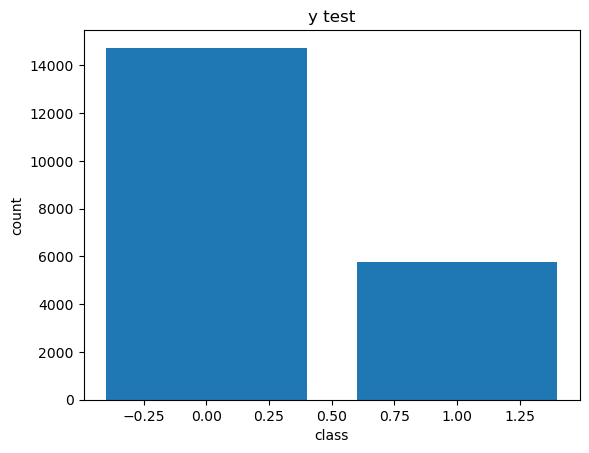

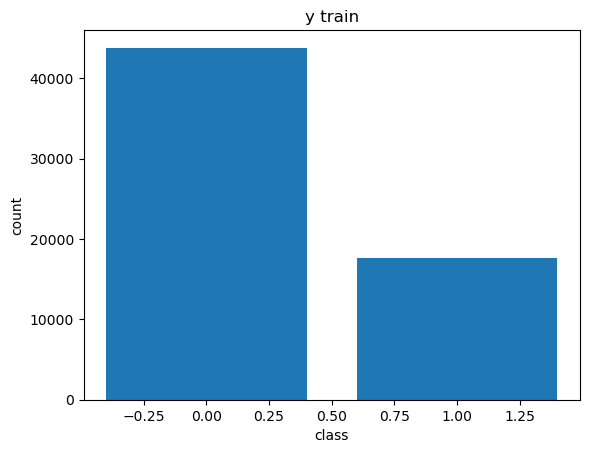

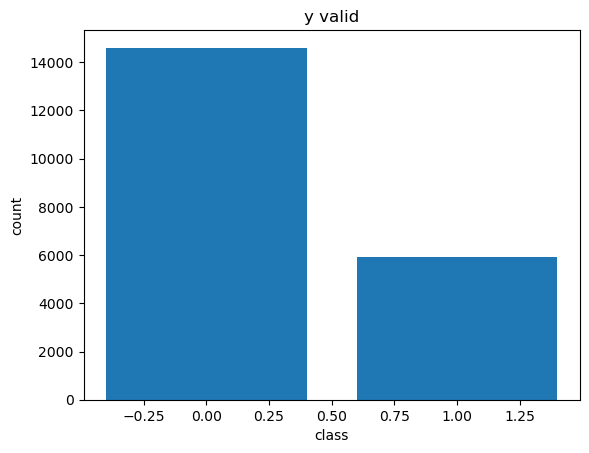

a (array([0, 1]), array([14736,  5772]))
b (array([0, 1]), array([43820, 17704]))
c (array([0, 1]), array([14603,  5905]))


In [49]:
a = np.unique(np.squeeze(y_test), return_counts=True)
plt.bar(x=a[0],height=a[1])
plt.title('y test')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

b = np.unique(np.squeeze(y_train), return_counts=True)
plt.bar(x=b[0],height=b[1])
plt.title('y train')
plt.xlabel('class')
plt.ylabel('count')

plt.show()

c = np.unique(np.squeeze(y_valid), return_counts=True)
plt.bar(x=c[0],height=c[1])
plt.title('y valid')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

print('a',a)
print('b',b)
print('c',c)

In [50]:
clf = TabNetClassifier(n_steps=1,
                                optimizer_fn=torch.optim.Adam,
                                optimizer_params=dict(lr=2e-2),
                                scheduler_params={"step_size":50, # how to use learning rate scheduler
                                                  "gamma":0.9},
                                scheduler_fn=torch.optim.lr_scheduler.StepLR,
                                mask_type='entmax', # "sparsemax",
                                lambda_sparse=0, # don't penalize for sparser attention
                       
                      )


Device used : cpu


In [51]:
max_epochs = 1000
clf.fit(
    X_train=x_train, y_train=np.squeeze(y_train),
    eval_set=[(x_valid, np.squeeze(y_valid))],
    eval_metric=['auc'],
    max_epochs=max_epochs ,
    patience=50, # please be patient ^^
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=1,
    drop_last=False,
)

y_train[:, 0]

epoch 0  | loss: 0.56716 | val_0_auc: 0.69379 |  0:00:01s
epoch 1  | loss: 0.50043 | val_0_auc: 0.75982 |  0:00:02s
epoch 2  | loss: 0.47027 | val_0_auc: 0.78966 |  0:00:03s
epoch 3  | loss: 0.45686 | val_0_auc: 0.79107 |  0:00:04s
epoch 4  | loss: 0.44705 | val_0_auc: 0.82016 |  0:00:05s
epoch 5  | loss: 0.4417  | val_0_auc: 0.83044 |  0:00:06s
epoch 6  | loss: 0.4341  | val_0_auc: 0.83927 |  0:00:07s
epoch 7  | loss: 0.42837 | val_0_auc: 0.84555 |  0:00:08s
epoch 8  | loss: 0.42544 | val_0_auc: 0.8521  |  0:00:10s
epoch 9  | loss: 0.41917 | val_0_auc: 0.85043 |  0:00:11s
epoch 10 | loss: 0.41683 | val_0_auc: 0.85348 |  0:00:12s
epoch 11 | loss: 0.41332 | val_0_auc: 0.85701 |  0:00:13s
epoch 12 | loss: 0.40974 | val_0_auc: 0.85776 |  0:00:14s
epoch 13 | loss: 0.40912 | val_0_auc: 0.85796 |  0:00:15s
epoch 14 | loss: 0.40417 | val_0_auc: 0.85945 |  0:00:16s
epoch 15 | loss: 0.40345 | val_0_auc: 0.85603 |  0:00:17s
epoch 16 | loss: 0.4     | val_0_auc: 0.86178 |  0:00:19s
epoch 17 | los

KeyboardInterrupt: 

In [ ]:
plt.plot(clf.history['loss'][5:])
# plt.plot(clf.history['valid']['loss'][5:])
plt.title('Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
plt.plot(clf.history['val_0_auc'][5:])
plt.title('val_0_auc')
plt.ylabel('auc')
plt.xlabel('Epoch')

In [ ]:
preds = clf.predict(x_test) 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
np.set_printoptions()
cm = confusion_matrix(y_test,preds)
cm_df = pd.DataFrame(cm,
                     index = ['Not Reached','Reached'], 
                     columns = ['Not Reached','Reached'])

plt.figure(figsize=(10,10))
cm_perc=(cm_df/np.sum(cm_df,axis=1)).fillna(0)
cm_perc


cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True,fmt='.0%')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()





In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, average=None)

In [ ]:
residuals  = np.squeeze(y_test) - preds
# residuals

# plt.hist(residuals, align='left',color='g', edgecolor='b',linewidth=1)
# plt.xlabel('Residuals: y_true-preds')
# plt.ylabel('Frequency')

error_df = pd.DataFrame(residuals, columns=["error"])
error_df

amount = [error_df['error'].loc[error_df['error']==-10].count(),
          error_df['error'].loc[error_df['error']==-9].count(),
          error_df['error'].loc[error_df['error']==-8].count(),
        error_df['error'].loc[error_df['error']==-7].count(),
         error_df['error'].loc[error_df['error']==-6].count(),
          error_df['error'].loc[error_df['error']==-5].count(),
         error_df['error'].loc[error_df['error']==-4].count(),
         error_df['error'].loc[error_df['error']==-3].count(),
         error_df['error'].loc[error_df['error']==-2].count(),
         error_df['error'].loc[error_df['error']==-1].count(),
         error_df['error'].loc[error_df['error']==0].count(),
         error_df['error'].loc[error_df['error']==1].count(),
          error_df['error'].loc[error_df['error']==2].count(),
        error_df['error'].loc[error_df['error']==3].count(),
         error_df['error'].loc[error_df['error']==4].count(),
          error_df['error'].loc[error_df['error']==5].count(),
         error_df['error'].loc[error_df['error']==6].count(),
         error_df['error'].loc[error_df['error']==7].count(),
         error_df['error'].loc[error_df['error']==8].count(),
         error_df['error'].loc[error_df['error']==9].count(),
         error_df['error'].loc[error_df['error']==10].count()]
data = {'clusters error':[*range(-10, 11, 1)],'amount':amount}
df = pd.DataFrame(data)

plt.bar(x=df['clusters error'],height=df['amount'])
plt.title('errors - True-Predictions')
plt.xlabel('errors [Clusters]')
plt.ylabel('count')

error_df['error'].loc[error_df['error']>10].count()


In [ ]:
colors = np.random.rand(20508)
from collections import Counter
c = Counter(zip(np.squeeze(y_test),np.squeeze(preds)))
# create a list of the sizes, here multiplied by 10 for scale
s = [(c[(xx,yy)]/4) for xx,yy in zip(np.squeeze(y_test),np.squeeze(preds))]

plt.scatter(y_test,preds, s=s,c =colors)
plt.xlabel('true value')
plt.ylabel('predictions')
plt.title('True vs Prediction - Multilabel Classification on raw data')
# To show the plot
plt.show()


# Balanced

In [57]:
no_sucsses = grouped_data.loc[grouped_data['Success_Rates']==0]
yes_sucsses = grouped_data.loc[grouped_data['Success_Rates']>0]
yes_sucsses

,Link2 length,Link3 length,Link4 length,Link5 length,Link6 length,Success_Rates,Joint2 type_pitch,Joint2 type_pris,Joint2 type_roll,Joint3 type_pitch,...,Joint3 axis_z,Joint4 axis_x,Joint4 axis_y,Joint4 axis_z,Joint5 axis_x,Joint5 axis_y,Joint5 axis_z,Joint6 axis_x,Joint6 axis_y,Joint6 axis_z
10,0.1,0.1,0.1,0.5,0.5,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
15,0.1,0.1,0.1,0.7,0.5,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
23,0.1,0.1,0.3,0.7,0.1,1,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
34,0.1,0.1,0.5,0.5,0.7,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
47,0.1,0.1,0.5,0.5,0.1,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102534,0.7,0.7,0.1,0.1,0.3,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
102535,0.7,0.7,0.3,0.1,0.1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
102536,0.7,0.7,0.1,0.1,0.3,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
102538,0.7,0.7,0.1,0.1,0.3,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [58]:
N_sucsses =no_sucsses.sample(29381)
grouped_data1 = pd.concat([yes_sucsses,N_sucsses]).reset_index(drop=True)
grouped_data_shuffled = grouped_data1.sample(frac=1).reset_index(drop=True)
grouped_data_shuffled

,Link2 length,Link3 length,Link4 length,Link5 length,Link6 length,Success_Rates,Joint2 type_pitch,Joint2 type_pris,Joint2 type_roll,Joint3 type_pitch,...,Joint3 axis_z,Joint4 axis_x,Joint4 axis_y,Joint4 axis_z,Joint5 axis_x,Joint5 axis_y,Joint5 axis_z,Joint6 axis_x,Joint6 axis_y,Joint6 axis_z
0,0.5,0.5,0.1,0.3,0.5,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0.1,0.1,0.7,0.5,0.5,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0.7,0.1,0.5,0.3,0.3,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0.3,0.1,0.1,0.7,0.3,1,0,1,0,1,...,1,0,1,0,0,0,1,0,1,0
4,0.5,0.7,0.3,0.3,0.1,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58757,0.5,0.1,0.3,0.3,0.7,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
58758,0.5,0.5,0.3,0.1,0.1,1,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
58759,0.5,0.3,0.5,0.5,0.1,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
58760,0.1,0.3,0.7,0.3,0.5,1,1,0,0,0,...,1,1,0,0,0,0,1,1,0,0


In [59]:
X = grouped_data_shuffled.loc[:,grouped_data_shuffled.columns != 'Success_Rates']
Y = grouped_data_shuffled.loc[:,grouped_data_shuffled.columns == 'Success_Rates']
X=X.to_numpy()
X = [[float(j) for j in i] for i in X]
X=np.array(X)
Y=Y.to_numpy()



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=2)
    
    
print("x train\n", x_train.shape)
print("y train\n", y_train.shape)

print("x valid\n", x_valid.shape)
print("y valid\n", y_valid.shape)

print("x test\n", x_test.shape)
print("y test\n", y_test.shape)


x train
 (35256, 34)
y train
 (35256, 1)
x valid
 (11753, 34)
y valid
 (11753, 1)
x test
 (11753, 34)
y test
 (11753, 1)


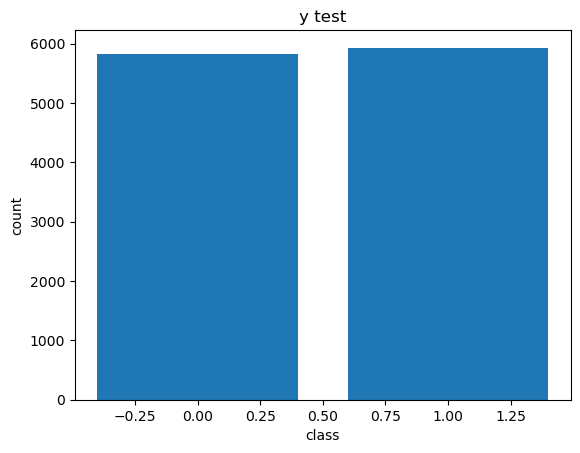

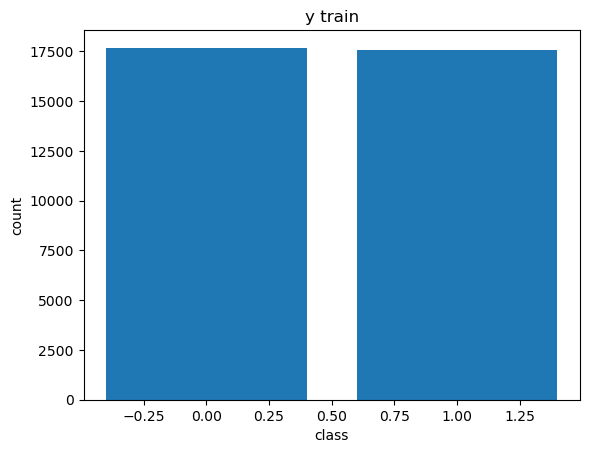

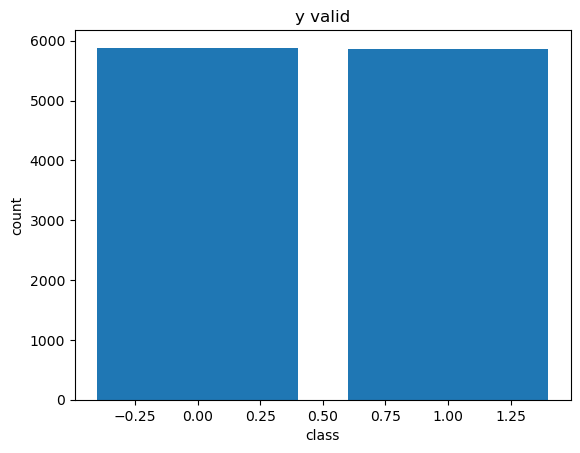

a (array([0, 1]), array([5820, 5933]))
b (array([0, 1]), array([17678, 17578]))
c (array([0, 1]), array([5883, 5870]))


In [60]:
a = np.unique(np.squeeze(y_test), return_counts=True)
plt.bar(x=a[0],height=a[1])
plt.title('y test')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

b = np.unique(np.squeeze(y_train), return_counts=True)
plt.bar(x=b[0],height=b[1])
plt.title('y train')
plt.xlabel('class')
plt.ylabel('count')

plt.show()

c = np.unique(np.squeeze(y_valid), return_counts=True)
plt.bar(x=c[0],height=c[1])
plt.title('y valid')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

print('a',a)
print('b',b)
print('c',c)

In [65]:
def objective(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_d = trial.suggest_int("n_d", 56, 64, step=4)
    n_steps = trial.suggest_int("n_steps",3,7 ,step=1)
    gamma = trial.suggest_float("gamma", 1., 1.6, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
    tabnet_params = dict(n_d=n_d, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    
    Classifier = TabNetClassifier(**tabnet_params)
    Classifier.fit(X_train=x_train, y_train=np.squeeze(y_train),
          eval_set=[(x_valid, np.squeeze(y_valid))],
          max_epochs=trial.suggest_int('epochs', 1, 100),
          eval_metric=['auc','accuracy'])
    preds = Classifier.predict(x_test)
    auc = roc_auc_score(y_test, preds)
    print("auc: ",auc)
    return auc

study = optuna.create_study(direction="maximize", study_name='TabNet optimization')
study.optimize(objective, timeout=6*60) #5 hours

[I 2023-01-01 13:00:27,570] A new study created in memory with name: TabNet optimization



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_accuracy = 0.79741
Best weights from best epoch are automatically used!


[I 2023-01-01 13:01:37,419] Trial 0 finished with value: 0.7858180379646025 and parameters: {'mask_type': 'entmax', 'n_d': 64, 'n_steps': 4, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 6.714197432742032e-06, 'epochs': 41}. Best is trial 0 with value: 0.7858180379646025.


auc:  0.7858180379646025
Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_0_accuracy = 0.59338
Best weights from best epoch are automatically used!


[I 2023-01-01 13:01:58,396] Trial 1 finished with value: 0.58423546034962 and parameters: {'mask_type': 'sparsemax', 'n_d': 64, 'n_steps': 7, 'gamma': 1.4, 'n_shared': 3, 'lambda_sparse': 0.00014128134197019776, 'epochs': 5}. Best is trial 0 with value: 0.7858180379646025.


auc:  0.58423546034962
Stop training because you reached max_epochs = 85 with best_epoch = 83 and best_val_0_accuracy = 0.74696
Best weights from best epoch are automatically used!


[I 2023-01-01 13:05:24,284] Trial 2 finished with value: 0.7424650290210906 and parameters: {'mask_type': 'sparsemax', 'n_d': 56, 'n_steps': 5, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 0.00043037361716370237, 'epochs': 85}. Best is trial 0 with value: 0.7858180379646025.


auc:  0.7424650290210906

Early stopping occurred at epoch 44 with best_epoch = 34 and best_val_0_accuracy = 0.79307
Best weights from best epoch are automatically used!


[I 2023-01-01 13:07:12,705] Trial 3 finished with value: 0.7892429958129235 and parameters: {'mask_type': 'entmax', 'n_d': 64, 'n_steps': 4, 'gamma': 1.6, 'n_shared': 3, 'lambda_sparse': 0.00037182559818621107, 'epochs': 89}. Best is trial 3 with value: 0.7892429958129235.


auc:  0.7892429958129235


In [71]:
trial = study.best_trial
TabNet_params = trial.params
TabNet_params
clf = TabNetClassifier(mask_type='entmax',
 n_d=64,
n_steps=4,
 gamma=1.6,
 n_shared= 3,
 lambda_sparse=0.00037182559818621107)
clf.fit(X_train=x_train, y_train=np.squeeze(y_train),
      eval_set=[(x_valid, np.squeeze(y_valid))],
      eval_metric=['auc'], max_epochs=89)

Device used : cpu
epoch 0  | loss: 0.87596 | val_0_auc: 0.57293 |  0:00:02s
epoch 1  | loss: 0.6926  | val_0_auc: 0.61472 |  0:00:04s
epoch 2  | loss: 0.65753 | val_0_auc: 0.657   |  0:00:07s
epoch 3  | loss: 0.64393 | val_0_auc: 0.67013 |  0:00:09s
epoch 4  | loss: 0.62532 | val_0_auc: 0.70169 |  0:00:11s
epoch 5  | loss: 0.60285 | val_0_auc: 0.73011 |  0:00:13s
epoch 6  | loss: 0.57884 | val_0_auc: 0.75196 |  0:00:16s
epoch 7  | loss: 0.56312 | val_0_auc: 0.7756  |  0:00:18s
epoch 8  | loss: 0.54496 | val_0_auc: 0.78639 |  0:00:20s
epoch 9  | loss: 0.53208 | val_0_auc: 0.8055  |  0:00:22s
epoch 10 | loss: 0.51759 | val_0_auc: 0.81545 |  0:00:25s
epoch 11 | loss: 0.50624 | val_0_auc: 0.82639 |  0:00:27s
epoch 12 | loss: 0.49617 | val_0_auc: 0.82987 |  0:00:29s
epoch 13 | loss: 0.48867 | val_0_auc: 0.83177 |  0:00:31s
epoch 14 | loss: 0.47952 | val_0_auc: 0.8405  |  0:00:34s
epoch 15 | loss: 0.47381 | val_0_auc: 0.83426 |  0:00:36s
epoch 16 | loss: 0.47097 | val_0_auc: 0.84477 |  0:00:

In [72]:
preds = clf.predict(x_test) 
auc = roc_auc_score(y_test,preds)
print(auc)

0.7843673599177066


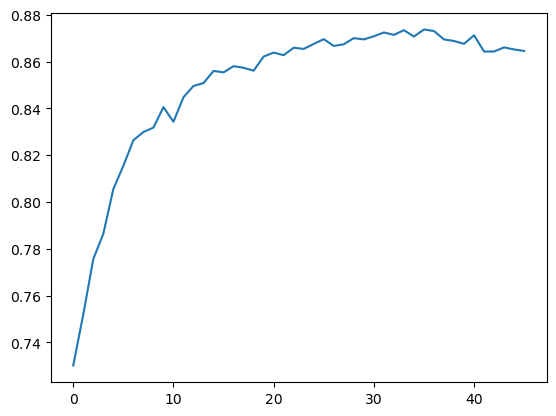

In [73]:
plt.plot(clf.history['val_0_auc'][5:])

0

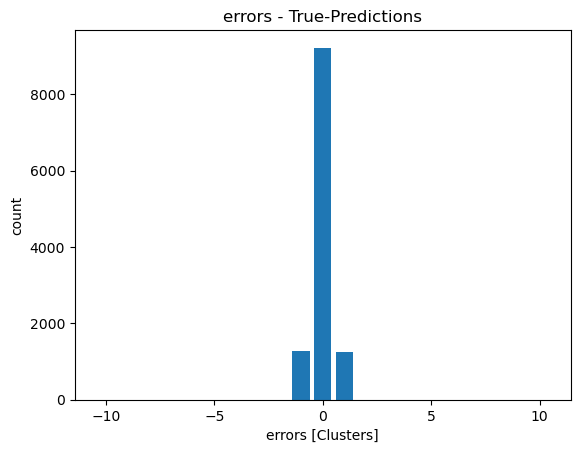

In [74]:
preds = clf.predict(x_test) 
residuals  = np.squeeze(y_test) - preds
# residuals

# plt.hist(residuals, align='left',color='g', edgecolor='b',linewidth=1)
# plt.xlabel('Residuals: y_true-preds')
# plt.ylabel('Frequency')

error_df = pd.DataFrame(residuals, columns=["error"])
error_df

amount = [error_df['error'].loc[error_df['error']==-10].count(),
          error_df['error'].loc[error_df['error']==-9].count(),
          error_df['error'].loc[error_df['error']==-8].count(),
        error_df['error'].loc[error_df['error']==-7].count(),
         error_df['error'].loc[error_df['error']==-6].count(),
          error_df['error'].loc[error_df['error']==-5].count(),
         error_df['error'].loc[error_df['error']==-4].count(),
         error_df['error'].loc[error_df['error']==-3].count(),
         error_df['error'].loc[error_df['error']==-2].count(),
         error_df['error'].loc[error_df['error']==-1].count(),
         error_df['error'].loc[error_df['error']==0].count(),
         error_df['error'].loc[error_df['error']==1].count(),
          error_df['error'].loc[error_df['error']==2].count(),
        error_df['error'].loc[error_df['error']==3].count(),
         error_df['error'].loc[error_df['error']==4].count(),
          error_df['error'].loc[error_df['error']==5].count(),
         error_df['error'].loc[error_df['error']==6].count(),
         error_df['error'].loc[error_df['error']==7].count(),
         error_df['error'].loc[error_df['error']==8].count(),
         error_df['error'].loc[error_df['error']==9].count(),
         error_df['error'].loc[error_df['error']==10].count()]
data = {'clusters error':[*range(-10, 11, 1)],'amount':amount}
df = pd.DataFrame(data)

plt.bar(x=df['clusters error'],height=df['amount'])
plt.title('errors - True-Predictions')
plt.xlabel('errors [Clusters]')
plt.ylabel('count')

error_df['error'].loc[error_df['error']<-10].count()

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, average=None)

0.7843673599177066

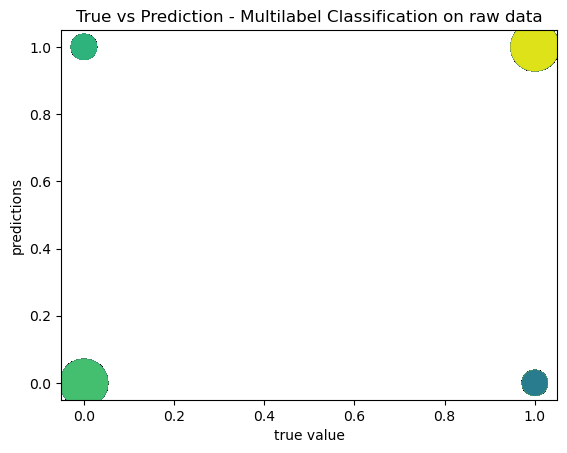

In [76]:
colors = np.random.rand(11753)
from collections import Counter
c = Counter(zip(np.squeeze(y_test),np.squeeze(preds)))
# create a list of the sizes, here multiplied by 10 for scale
s = [(c[(xx,yy)]/4) for xx,yy in zip(np.squeeze(y_test),np.squeeze(preds))]

plt.scatter(y_test,preds, s=s,c =colors)
plt.xlabel('true value')
plt.ylabel('predictions')
plt.title('True vs Prediction - Multilabel Classification on raw data')
# To show the plot
plt.show()

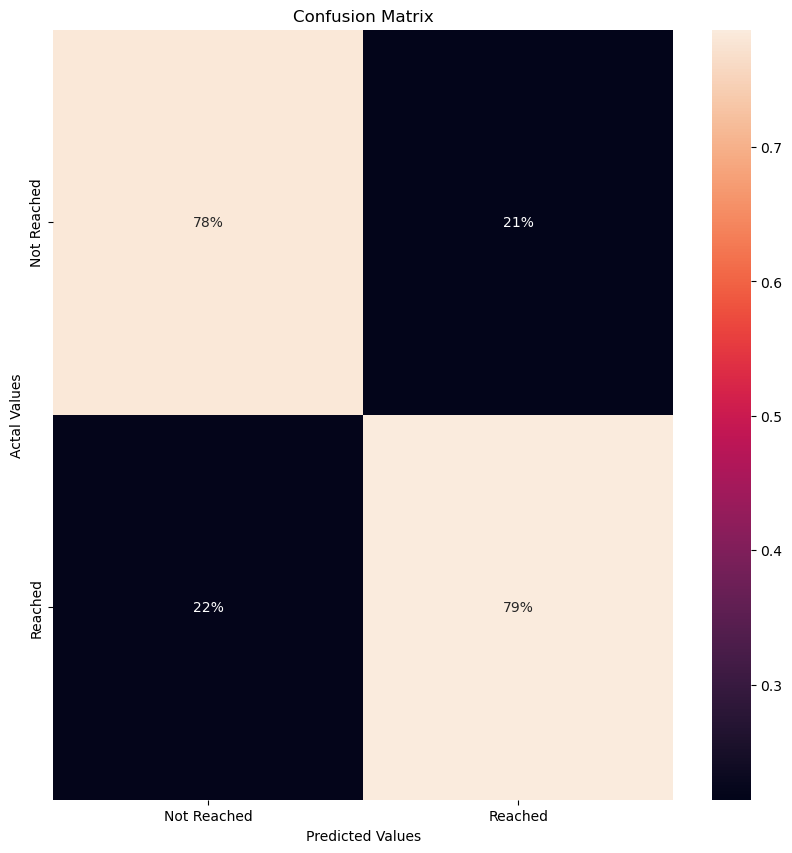

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
np.set_printoptions()
cm = confusion_matrix(y_test,preds)
cm_df = pd.DataFrame(cm,
                     index = ['Not Reached','Reached'], 
                     columns = ['Not Reached','Reached'])

plt.figure(figsize=(10,10))
cm_perc=(cm_df/np.sum(cm_df,axis=1)).fillna(0)
cm_perc

sns.heatmap(cm_perc, annot=True,fmt='.0%')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# plt.figure(figsize=(10,10))
# sns.heatmap(cm_df, annot=True,fmt=".1f")
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()
# cm
# # tn, fp, fn, tp